In [14]:
import pandas as pd
import numpy as np

from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

# Тесты

## Бутстрэп (Bootstrap):

Область применения: Бутстрэп используется для оценки статистических характеристик выборки, таких как среднее значение или доверительный интервал, путем генерации множества подвыборок с повторениями из исходной выборки.

Условия принятия/непринятия гипотезы: Бутстрэп не проверяет гипотезы напрямую, а помогает получить оценки параметров и их доверительные интервалы.

In [ ]:
# Бутстрэп
data = np.array([1, 2, 3, 4, 5])
bootstrap_samples = []
n_iterations = 1000
sample_size = len(data)
for _ in range(n_iterations):
    sample = np.random.choice(data, size=sample_size, replace=True)
    bootstrap_samples.append(sample)
means = np.mean(bootstrap_samples, axis=1)
confidence_interval = np.percentile(means, [2.5, 97.5])
print(f"Доверительный интервал: {confidence_interval}")

## Проверка нормальности (Normality Test):

Область применения: Проверка нормальности используется для оценки, насколько данные следуют нормальному распределению.

Условия принятия/непринятия гипотезы: В проверке нормальности используются различные тесты, такие как тест Шапиро-Уилка или тест Колмогорова-Смирнова. Гипотеза о нормальности данных принимается или отвергается на основе выбранного уровня значимости.

In [ ]:
# Проверка нормальности
data = np.array([1, 2, 3, 4, 5])
_, p_value = stats.shapiro(data)
print(f"p-значение: {p_value}")

## T-тест:

Область применения: Используется для проверки различий между средними значениями двух групп или между средним значением выборки и известным значением популяции.

Условия принятия гипотезы: Если p-значение меньше выбранного уровня значимости (обычно 0.05), гипотеза о различиях между средними значениями принимается.

Условия непринятия гипотезы: Если p-значение больше выбранного уровня значимости, гипотеза о различиях между средними значениями отвергается.

Уровень p: Обычно выбирается уровень значимости 0.05.as_integer_ratio

In [4]:
# Одновыборочный t-тест
# H0: Среднее значение выборки равно заданному значению
# H1: Среднее значение выборки не равно заданному значению
sample = [1, 2, 3, 4, 5]
t_stat, p_value = stats.ttest_1samp(sample, 3)
print(f"t-статистика: {t_stat}")
print(f"p-значение: {p_value}")

t-статистика: 0.0
p-значение: 1.0


## Проверка равенства дисперсий (Equal Variance Test):

Область применения: Используется для проверки равенства дисперсий двух или более групп.

Если p-значение меньше выбранного уровня значимости (обычно 0.05), то нулевая гипотеза о равенстве дисперсий отвергается, и можно сделать вывод о наличии статистически значимых различий в дисперсиях выборок.

Если p-значение больше или равно выбранному уровню значимости, то нулевая гипотеза не отвергается, и делается вывод о равенстве дисперсий выборок.

In [ ]:
group1 = pd.Series([1, 2, 3, 4, 5])
group2 = pd.Series([2, 4, 6, 8, 10])
_, p_value = stats.levene(group1, group2)
print(f"p-значение: {p_value}")

## Анализ дисперсии (ANOVA):

Область применения: Используется для сравнения средних значений трех или более групп.
Условия принятия гипотезы: Если p-значение меньше выбранного уровня значимости, то есть нет статистически значимых различий между средними значениями групп, то нулевая гипотеза о равенстве средних принимается.

Условия непринятия гипотезы: Если p-значение больше выбранного уровня значимости, то есть имеются статистически значимые различия между средними значениями групп, то нулевая гипотеза отвергается в пользу альтернативной гипотезы о неравенстве средних.

Уровень p: Обычно выбирается уровень значимости 0.05.

In [7]:
# ANOVA
# H0: Средние значения групп равны
# H1: Средние значения групп не равны
data = pd.read_csv('data.csv')
group1 = data[data['Group'] == 'A']['Value']
group2 = data[data['Group'] == 'B']['Value']
group3 = data[data['Group'] == 'C']['Value']
f_stat, p_value = stats.f_oneway(group1, group2, group3)
print(f"F-статистика: {f_stat}")
print(f"p-значение: {p_value}")

# Анализ зависомости факторов и компонентов

## Корреляционный анализ:

Область применения: Используется для оценки силы и направления связи между двумя количественными переменными.

Условия принятия гипотезы: Если p-значение меньше выбранного уровня значимости, то есть достаточно сильная связь между переменными, то нулевая гипотеза о независимости переменных принимается.

Условия непринятия гипотезы: Если p-значение больше выбранного уровня значимости, то есть недостаточно сильная связь между переменными, то нулевая гипотеза отвергается в пользу альтернативной гипотезы о зависимости переменных.

Уровень p: Обычно выбирается уровень значимости 0.05.

In [9]:
# Корреляционный анализ
# H0: Нет корреляции между переменными
# H1: Есть корреляция между переменными
data = pd.read_csv('data.csv')
correlation_coef, p_value = stats.pearsonr(data['Variable1'], data['Variable2'])
print(f"Коэффициент корреляции: {correlation_coef}")
print(f"p-значение: {p_value}")

## Тест Спирмена (Spearman's Rank Correlation Test):

Область применения: Используется для оценки степени монотонной связи между двумя переменными, основываясь на их ранговых значениях.

Условия принятия гипотезы: Если p-значение меньше выбранного уровня значимости, то есть достаточно сильная монотонная связь между переменными, то нулевая гипотеза о независимости переменных принимается.

Условия непринятия гипотезы: Если p-значение больше выбранного уровня значимости, то есть недостаточно сильная монотонная связь между переменными, то нулевая гипотеза отвергается в пользу альтернативной гипотезы о зависимости переменных.

Уровень p: Обычно выбирается уровень значимости 0.05.

In [ ]:
# Тест Спирмена
# H0: Нет монотонной связи между переменными
# H1: Есть монотонная связь между переменными
data = pd.read_csv('data.csv')
correlation_coef, p_value = stats.spearmanr(data['Variable1'], data['Variable2'])
print(f"Коэффициент корреляции Спирмена: {correlation_coef}")
print(f"p-значение: {p_value}")

## Анализ факторов (Factor Analysis):

Область применения: Используется для выявления структуры скрытых факторов и исследования межфакторных отношений на основе множества наблюдаемых переменных.

Условия принятия/непринятия гипотезы: Зависит от метода оценки факторной модели и статистических критериев, таких как общая объясненная дисперсия или значимость факторов и переменных.

In [ ]:
from factor_analyzer import FactorAnalyzer

# Анализ факторов
data =pd.read_csv('data.csv')
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(data)
print(fa.loadings_)

## Анализ главных компонент (Principal Component Analysis, PCA):

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

Область применения: Анализ главных компонент используется для уменьшения размерности данных путем преобразования их в новый набор переменных (главные компоненты), сохраняющий максимальное количество информации.

Условия применения: Анализ главных компонент применяется, когда есть множество исходных переменных и требуется упростить модель или уменьшить размерность данных.

In [ ]:
from sklearn.decomposition import PCA

# Анализ главных компонент
data = pd.read_csv('data.csv')
X = data[['Feature1', 'Feature2', 'Feature3']]
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(X)

## Проверка независимости (Independence Test):

Область применения: Используется для проверки независимости между двумя переменными, особенно между категориальными переменными.

Условия принятия/непринятия гипотезы: В зависимости от выбранного теста, гипотеза о независимости переменных принимается или отвергается на основе выбранного уровня значимости.

In [15]:
# Проверка независимости
data = pd.DataFrame({'Variable1': [1, 1, 0, 0, 1], 'Variable2': [1, 0, 1, 0, 0]})
contingency_table = pd.crosstab(data['Variable1'], data['Variable2'])
_, p_value, _, _ = stats.chi2_contingency(contingency_table)
print(f"p-значение: {p_value}")

p-значение: 1.0


# Временные ряды

## Анализ временных рядов:

Область применения: Анализ временных рядов используется для моделирования и прогнозирования последовательности данных, где наблюдения упорядочены во времени.

Условия принятия/непринятия гипотезы: В анализе временных рядов гипотезы могут быть связаны с наличием тренда, сезонности или стационарности в данных.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Анализ временных рядов
data = pd.read_csv('data.csv')
time_series = pd.Series(data['Value'], index=data['Date'])
decomposition = seasonal_decompose(time_series, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

## Анализ выживаемости (Survival Analysis):

Область применения: Анализ выживаемости используется для моделирования времени до наступления события (например, выживания пациента или отказа оборудования) и оценки факторов, влияющих на выживаемость.

Условия принятия/непринятия гипотезы: В анализе выживаемости гипотезы могут быть связаны с наличием различий в выживаемости между группами и с влиянием факторов на выживаемость.

In [ ]:
from lifelines import KaplanMeierFitter

# Анализ выживаемости
data = pd.read_csv('data.csv')
time = data['Time']
event = data['Event']
kmf = KaplanMeierFitter()
kmf.fit(time, event)
survival_probability = kmf.survival_function_

# Регрессия 

## Логистическая регрессия (Logistic Regression):

Область применения: Используется для моделирования бинарных или многоклассовых зависимых переменных, основываясь на наборе предикторов.

Условия принятия/непринятия гипотезы: Зависит от выбранного метода оценки модели и статистических критериев. Обычно используется анализ значимости коэффициентов и проверка статистической значимости модели в целом.

In [ ]:
import statsmodels.api as sm

# Логистическая регрессия
# Предикторы: X1, X2, X3
# Зависимая переменная: y
data = pd.read_csv('data.csv')
X = data[['X1', 'X2', 'X3']]
X = sm.add_constant(X)
y = data['y']
model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

##  Линейная регрессионный анализ:

Область применения: Регрессионный анализ используется для моделирования зависимости между зависимой переменной и одной или несколькими независимыми переменными.

Условия принятия/непринятия гипотезы: В регрессионном анализе проверяются статистическая значимость коэффициентов модели, а также оценивается качество подгонки модели к данным.

In [ ]:
import statsmodels.api as sm

# Регрессионный анализ
data = pd.read_csv('data.csv')
X = data[['Feature1', 'Feature2', 'Feature3']]
X = sm.add_constant(X)
y = data['Target']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Кластерный анализ:

Область применения: Кластерный анализ используется для группировки объектов в кластеры на основе их сходства.
Условия принятия/непринятия гипотезы: В кластерном анализе не проверяются гипотезы, а исследуется структура данных для выявления групп схожих объектов.
Пример кода:

In [ ]:
from sklearn.cluster import KMeans

# Кластерный анализ
data = pd.read_csv('data.csv')
X = data[['Feature1', 'Feature2', 'Feature3']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
cluster_labels = kmeans.labels_
print(cluster_labels)

## определения оптимального количества кластеров в данных 

In [17]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

# Подготовка данных
# df = pd.DataFrame(...)  # Замените ... на ваши данные

# Расчет матрицы расстояний
dist_matrix = pdist(df)

# Выполнение иерархической кластеризации
linkage_matrix = linkage(dist_matrix, method='ward')  # Метод 'ward' использует метод Варда для объединения кластеров

# Определение оптимального числа кластеров
max_d = 10  # Максимальное расстояние для определения числа кластеров
clusters = fcluster(linkage_matrix, max_d, criterion='distance')  # Получение меток кластеров

# Определение количества уникальных кластеров
num_clusters = len(np.unique(clusters))

print("Количество кластеров:", num_clusters)

Количество кластеров: 2


In [ ]:
Или метод локтя 

In [19]:
from sklearn.cluster import KMeans
# Подготовка данных
# X = ...

# Построение графика метода локтя
inertias = []
k_values = range(1, 5)  # Попробуйте разные значения количества кластеров
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

# plt.plot(k_values, inertias, 'bx-')
# plt.xlabel('Количество кластеров')
# plt.ylabel('Инерция')
# plt.title('Метод локтя')
# plt.show()

# Задания

In [3]:
# Создание датафрейма
df = pd.DataFrame({
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [2, 4, 6, 8, 10],
    'Variable3': [3, 6, 9, 12, 15]
})

#### Проверка независимости: Проверьте независимость между переменными Variable1 и Variable2.

In [48]:
# H0 -> X1 != X2 if p > 0.5
# H1 -> X1 == x2 if p < 0.5

table = pd.crosstab(df.Variable1, df.Variable2)
res = stats.chi2_contingency(table)
res[1] 

0.24143645097027538

#### Корреляционный анализ: Вычислите коэффициент корреляции между переменными Variable1 и Variable3. Оцените статистическую значимость корреляции.

In [53]:
# H0: Нет корреляции между переменными
# H1: Есть корреляция между переменными
stats.pearsonr(df.Variable1, df.Variable3).pvalue

0.02379300981289938

#### Тест Стьюдента: Проведите одновыборочный t-тест для сравнения среднего значения Variable1 с известным значением. Проведите двухвыборочный t-тест для сравнения средних значений между Variable1 и Variable2.

In [64]:
stats.ttest_1samp(df.Variable1, 3.5)#.pvalue

Ttest_1sampResult(statistic=-0.7071067811865475, pvalue=0.5185185185185183)

In [67]:
stats.ttest_ind(df.Variable1, df.Variable2)

Ttest_indResult(statistic=-1.8973665961010275, pvalue=0.09434977284243756)

#### Анализ дисперсии: Проверьте равенство дисперсий между Variable2 и Variable3.

In [68]:
stats.levene(df.Variable2, df.Variable3)

LeveneResult(statistic=0.7912087912087913, pvalue=0.39969146874999956)

#### Линейная регрессия: Постройте линейную регрессионную модель для предсказания значения Variable3 на основе Variable1. Оцените коэффициенты регрессии и качество модели.

In [93]:
import statsmodels.api as sm

y = sm.add_constant(df.Variable3)
m = sm.OLS(df.Variable1, y)
res = m.fit()
res.params

const        1.554312e-15
Variable3    3.333333e-01
dtype: float64

In [92]:
res.rsquared

1.0

In [91]:
res.bse

const        1.344547e-15
Variable3    1.351320e-16
dtype: float64

In [98]:
residuals = res.resid
# residuals.plot()

In [88]:
print(res.t_test([1,0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          1.554e-15   1.34e-15      1.156      0.331   -2.72e-15    5.83e-15


#### Анализ временных рядов: Проанализируйте временной ряд Variable3 и определите наличие тренда, сезонности или других временных особенностей.

#### Анализ главных компонент: Примените анализ главных компонент для уменьшения размерности данных и определите наиболее значимые компоненты.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2).fit(df)
new_components = pca.transform(df)
new_components

array([[ 7.48331477e+00, -1.77635684e-15],
       [ 3.74165739e+00, -8.88178420e-16],
       [ 0.00000000e+00,  0.00000000e+00],
       [-3.74165739e+00,  8.88178420e-16],
       [-7.48331477e+00,  1.77635684e-15]])

In [5]:
# oбъясненная дисперсия n массив 
pca.explained_variance_ratio_ 

array([1.00000000e+00, 6.03720081e-33])

In [118]:
# объясненная изменчивость отношения:
# Процентная дисперсия, объясненная каждым из выбранных компонентов.
# Если n_componentsне установлено, то сохраняются все компоненты и сумма коэффициентов равна 1,0

pca.explained_variance_ratio_

array([1.00000000e+00, 6.03720081e-33])

In [12]:
# Определение наиболее значимых компонент
most_significant_components = pca.components_
print("Наиболее значимые компоненты:")
for i, component in enumerate(most_significant_components):
    print(f"Компонента {i+1}: {component}")

Наиболее значимые компоненты:
Компонента 1: [-0.26726124 -0.53452248 -0.80178373]
Компонента 2: [-0.16903085  0.84515425 -0.50709255]


#### Анализ выживаемости: Проанализируйте время до отказа для Variable2 с использованием метода анализа выживаемости (например, метод Каплана-Мейера).

#### Проверка нормальности: Проверьте нормальность распределения переменной Variable1 с использованием соответствующего теста (например, тест Шапиро-Уилка).

In [122]:
stats.shapiro(df.Variable1)

ShapiroResult(statistic=0.9867621660232544, pvalue=0.9671739339828491)

#### Кластерный анализ: Произведите кластерный анализ для всех переменных в датафрейме и определите оптимальное количество кластеров и их характеристики.

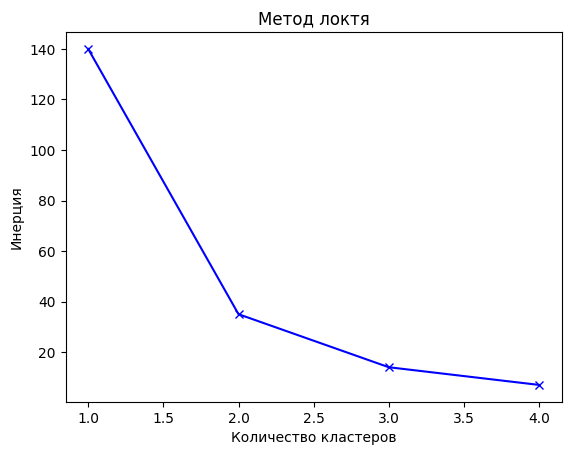

In [16]:
from sklearn.cluster import KMeans
# Подготовка данных
# X = ...

# Построение графика метода локтя
inertias = []
k_values = range(1, 5)  # Попробуйте разные значения количества кластеров
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя')
plt.show()

#### Бутстрэп: Примените метод бутстрэп для оценки доверительного интервала среднего значения переменной Variable3.

In [43]:
iterations = 1000
bodstrap_semples = []
sample_size = len(df) # размер образца

for _ in range(iterations):
    sample = np.random.choice(df.Variable3, size= sample_size) # образец
    bodstrap_semples.append(sample)
    
mean = np.mean(bodstrap_semples, axis=1)
conf_interval = np.percentile(mean, (2.5, 97.5))
# conf_interval

conf_interval, np.percentile( df.Variable3, (2.5, 97.5))

(array([ 5.4, 12.6]), array([ 3.3, 14.7]))

#### Логистическая регрессия: Постройте логистическую регрессионную модель для предсказания бинарного исхода на основе Variable1 и Variable2. Оцените коэффициенты регрессии и качество модели.

In [58]:
np.where(df.Variable3 < df.Variable3.mean() , 0, 1)

array([0, 0, 1, 1, 1])

In [64]:
import statsmodels.api as sm

X = sm.add_constant(df.Variable1)
y = np.where(df.Variable3 < df.Variable3.mean() , 0, 1)

lr = sm.Logit(y, X)
res = lr.fit()

         Current function value: 0.000000
         Iterations: 35


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                    5
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                            1
Date:                Sat, 08 Jul 2023   Pseudo R-squ.:                   1.000
Time:                        23:47:45   Log-Likelihood:            -5.0138e-10
converged:                      False   LL-Null:                       -3.3651
Covariance Type:            nonrobust   LLR p-value:                  0.009480
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -110.4353   2.23e+05     -0.000      1.000   -4.38e+05    4.38e+05
Variable1     44.2438   9.07e+04      0.000      1.000   -1.78e+05    1.78e+05
==============================================================================

Complete Separation: The results show that there iscomplete separation or perfect prediction.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

Dep. Variable: y - Обозначает зависимую переменную модели, которая называется "y" в данном случае.

No. Observations: 5 - Количество наблюдений, использованных для оценки модели.

Model: Logit - Использованная модель, в данном случае логистическая регрессия.

Df Residuals: 3 - Степени свободы остатков (количество наблюдений минус количество параметров модели).

Method: MLE - Метод оценки параметров модели, в данном случае метод максимального правдоподобия.

Date: Sat, 08 Jul 2023 - Дата, когда модель была оценена.

Pseudo R-squ.: 1.000 - Псевдо R-квадрат, который представляет объясненную долю дисперсии в данных моделью. Значение 1.000 указывает на идеальное соответствие данных модели.

Time: 23:47:45 - Время, когда модель была оценена.

Log-Likelihood: -5.0138e-10 - Значение логарифма правдоподобия модели.

converged: False - Указывает, сходилась ли модель во время оценки. Значение False указывает на то, что модель не сходилась.

LL-Null: -3.3651 - Логарифм правдоподобия нулевой модели (модели без предикторов).

Covariance Type: nonrobust - Тип ковариационной матрицы, использованной для оценки стандартных ошибок коэффициентов. В данном случае, используется неробастный тип.

LLR p-value: 0.009480 - p-значение для теста отношения правдоподобия, который проверяет значимость всей модели по сравнению с нулевой моделью.

coef: Коэффициенты модели.

std err: Стандартные ошибки коэффициентов модели.

z: Значение статистики z, которая вычисляется делением коэффициента на его стандартную ошибку.

P>|z|: p-значение для теста нулевой гипотезы о незначимости коэффициента.

[0.025 0.975]: Доверительный интервал для коэффициента.

Обратите внимание, что значения, которые начинаются с "const" и "Variable1", представляют коэффициенты для константы и переменной "Variable1" в модели логистической регрессии. Столбец "z" и "P>|z|" указывают на значимость каждого коэффициента с помощью соответствующего p-значения.